In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, ReLU
from keras.models import Sequential

import os
import cv2
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "/kaggle/input/shai-level-2-training-2023/train"
test_path = "/kaggle/input/shai-level-2-training-2023/test"
classes = ['covid','normal','virus']
img_width,img_height,channel = 48,48,3

In [3]:
#let's first import the test dataset
test_df = [] 
for i in os.listdir(test_path):
    img = cv2.imread(os.path.join(test_path,i))
    img_resized = cv2.resize(img,(img_width,img_height))
    test_df.append(img_resized)

In [4]:
len(test_df), type(test_df)

(513, list)

In [5]:
# we will import the train data , using this code
def import_data(dataset, path, categories):
    for i in categories:
        full_path = os.path.join(path,i)
        label = classes.index(i)
        for j in os.listdir(full_path):
            try:
                img = cv2.imread(os.path.join(full_path,j))
                img_resized = cv2.resize(img,(img_width,img_height))
                dataset.append([img_resized,label])
            except :
                pass
    random.shuffle(dataset)
# now lt's import the train data using the import_data function
train_df = []
import_data(train_df,train_path,classes)


In [6]:
train_data = pd.DataFrame(train_df,columns=['image','label'])
train_data.shape

(1196, 2)

In [7]:
train_data.head()

,image,label
0,"[[[252, 252, 252], [252, 252, 252], [0, 0, 0],...",2
1,"[[[0, 0, 0], [5, 5, 5], [33, 33, 33], [51, 51,...",1
2,"[[[150, 150, 150], [144, 144, 144], [42, 42, 4...",2
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
4,"[[[41, 41, 41], [57, 57, 57], [72, 72, 72], [7...",2


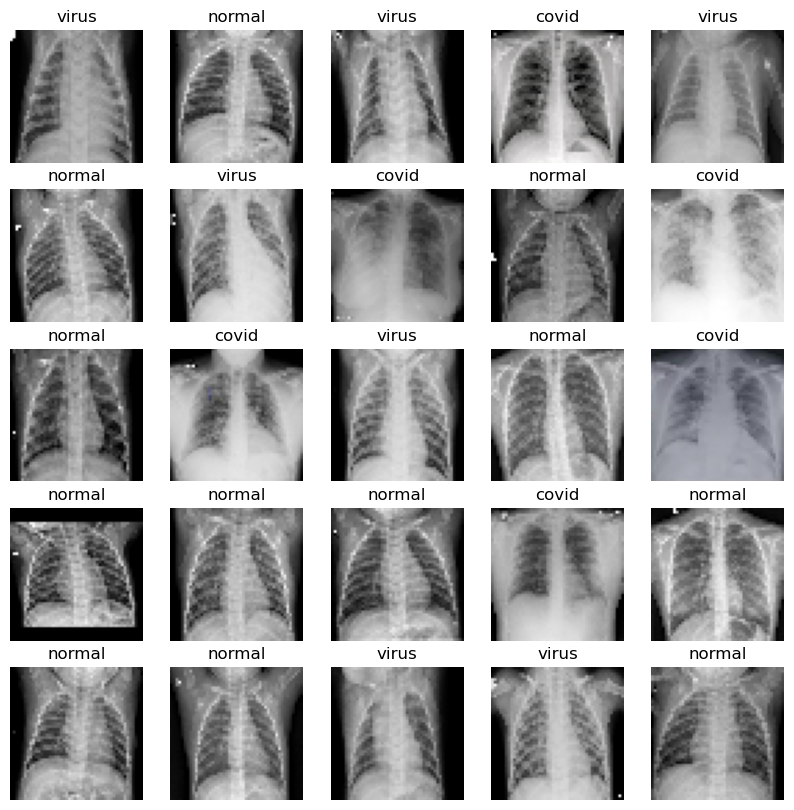

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_data.image[i])
    plt.title(classes[train_data.label[i]])
    plt.axis('off')

In [9]:
print(classes)
train_data.label.value_counts()

['covid', 'normal', 'virus']


1    468
2    433
0    295
Name: label, dtype: int64

In [10]:
train_stack = np.stack(train_data.image)
train_stack.shape

(1196, 48, 48, 3)

## 1. Model using Cnn & Ann  --------------------------------------------------------------------

In [41]:
from keras.optimizers import Adam
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(img_width,img_height,3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))


# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.2))

# model.add(layers.Conv2D(filters=512, kernel_size=(3,3), padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.2))


model.add(layers.Flatten())

# model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dense(units=3,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_stack,train_data.label,epochs=10, validation_split = 0.2, batch_size=32)

Epoch 1/10
19/30 [==================>...........] - ETA: 0s - loss: 0.7419 - accuracy: 0.7862

2023-08-25 13:07:23.060670: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_14/dropout_52/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


30/30 [==============================] - 1s 16ms/step - loss: 0.6201 - accuracy: 0.8169 - val_loss: 2.9610 - val_accuracy: 0.5792
Epoch 2/10
30/30 [==============================] - 0s 8ms/step - loss: 0.2914 - accuracy: 0.9142 - val_loss: 0.9608 - val_accuracy: 0.7292
Epoch 3/10
30/30 [==============================] - 0s 7ms/step - loss: 0.1858 - accuracy: 0.9278 - val_loss: 3.7817 - val_accuracy: 0.5792
Epoch 4/10
30/30 [==============================] - 0s 7ms/step - loss: 0.1291 - accuracy: 0.9529 - val_loss: 1.5155 - val_accuracy: 0.6667
Epoch 5/10
30/30 [==============================] - 0s 7ms/step - loss: 0.1755 - accuracy: 0.9372 - val_loss: 0.4038 - val_accuracy: 0.8833
Epoch 6/10
30/30 [==============================] - 0s 9ms/step - loss: 0.1160 - accuracy: 0.9592 - val_loss: 0.1487 - val_accuracy: 0.9625
Epoch 7/10
30/30 [==============================] - 0s 7ms/step - loss: 0.1201 - accuracy: 0.9561 - val_loss: 0.2534 - val_accuracy: 0.9125
Epoch 8/10
30/30 [============

#### loss vs val_loss using line plot 

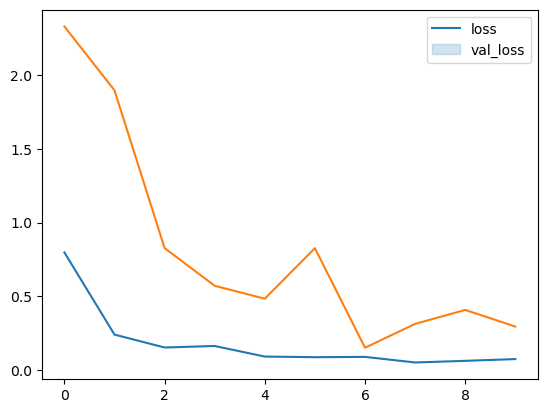

In [12]:
sns.lineplot(model.history.history['loss'])
sns.lineplot(model.history.history['val_loss'])
plt.legend(['loss','val_loss'])

#### Challenges : 
In the above figure the val_accuracy was fluctuating too much , there may be several reasons :

* 1. Small Batch Size : Using a small batch size can lead to noisy updates of the model's weights, causing the validation   accuracy to fluctuate.That's why we have increased the batch size but it did not work.

* 2. Learning Rate: An overly high learning rate can cause the model to overshoot optimal weight values, leading to oscillations in accuracy.

* 3. Model Complexity: A complex model might struggle to converge smoothly, causing validation accuracy to fluctuate.So after removing some layers it worked and now its performing little better than the previous one.

In [13]:
y_pred = model.predict(np.stack(test_df))
prediction = [np.argmax(i) for i in y_pred]
prediction[:5]

17/17 [==============================] - 0s 4ms/step


[1, 1, 2, 2, 2]

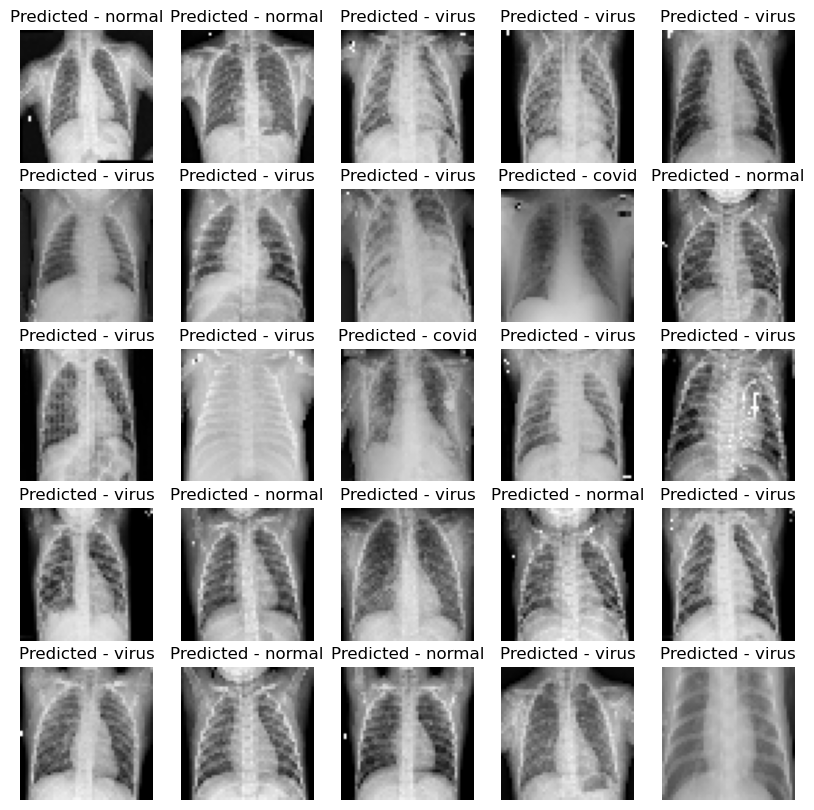

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_df[i])
    plt.title(f'Predicted - {classes[prediction[i]]}')
    plt.axis('off')

## 2. Using Transfer Learning --------------------------------------------------------------------
#### Models like 
* VGG16
* Resnet50
* VGG19

In [36]:
# importing the model
from tensorflow.keras.applications.vgg16 import VGG16
vgg16 = VGG16(
    include_top=False,
    weights='imagenet',
    input_shape = (48,48,3))

# we will set the trainable params as false as we will use their predefined weights only
vgg16.trainable=False

# let's build and train the model 
model = Sequential()
model.add(vgg16)
#ann layers
model.add(layers.Flatten())
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=3,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()
model.fit(train_stack,train_data.label,epochs=40, validation_split = 0.2)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 512)               0         
                                                                 
 dense_42 (Dense)            (None, 256)               131328    
                                                                 
 dropout_35 (Dropout)        (None, 256)               0         
                                                                 
 dense_43 (Dense)            (None, 256)               65792     
                                                                 
 dropout_36 (Dropout)        (None, 256)               0         
                                                                 
 dense_44 (Dense)            (None, 512)              

<AxesSubplot:>

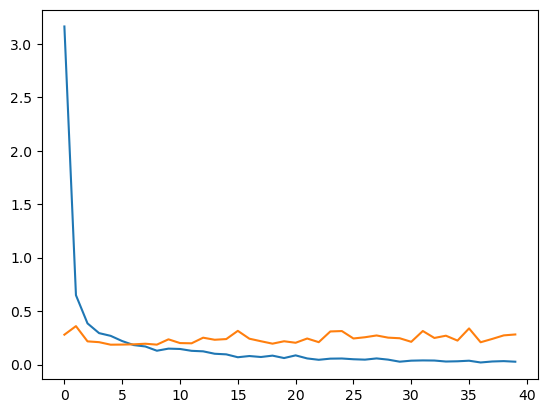

In [29]:
sns.lineplot(model.history.history['loss'])
sns.lineplot(model.history.history['val_loss'])

In [43]:
from tensorflow.keras.applications import ResNet50

# Load a pre-trained ResNet model
resnet_50 = ResNet50( include_top=False,
    weights='imagenet',
    input_shape = (48,48,3))

resnet_50.trainable = False
# let's build and train the model 
model = Sequential()
model.add(resnet_50)

model.add(layers.Flatten())
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=3,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()
model.fit(train_stack,train_data.label,epochs=20, validation_split = 0.2)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2, 2, 2048)        23587712  
                                                                 
 flatten_15 (Flatten)        (None, 8192)              0         
                                                                 
 dense_57 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_56 (Dropout)        (None, 256)               0         
                                                                 
 dense_58 (Dense)            (None, 256)               65792     
                                                                 
 dropout_57 (Dropout)        (None, 256)               0         
                                                                 
 dense_59 (Dense)            (None, 512)             

<AxesSubplot:>

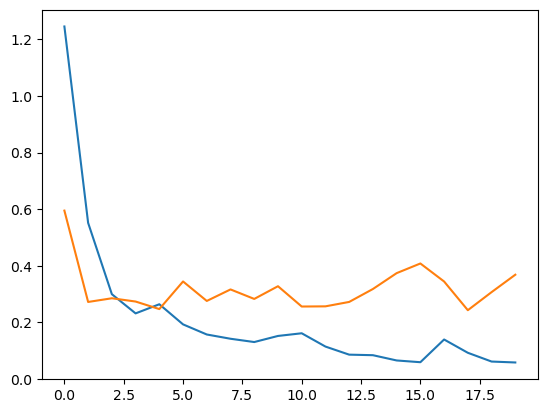

In [44]:
sns.lineplot(model.history.history['loss'])
sns.lineplot(model.history.history['val_loss'])

In [35]:
# importing vgg19
from tensorflow.keras.applications.vgg19 import VGG19

vgg19 = VGG19(
    include_top=False,
    weights='imagenet',
    input_shape = (48,48,3))
# we will set the trainable params as false as we will use the weights
vgg19.trainable=False
# let's build and train the model 
model = Sequential()
model.add(vgg19)

model.add(layers.Flatten())
model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(units=256,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=3,activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()
model.fit(train_stack,train_data.label,epochs=40, validation_split = 0.2)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 256)               65792     
                                                                 
 dropout_32 (Dropout)        (None, 256)               0         
                                                                 
 dense_39 (Dense)            (None, 512)              

<AxesSubplot:>

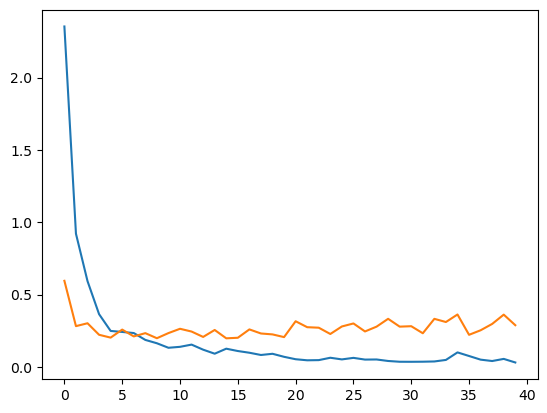

In [31]:
sns.lineplot(model.history.history['loss'])
sns.lineplot(model.history.history['val_loss'])

In [21]:
test={}
test['Image'] = [i for i in os.listdir(test_path)]
test['Label'] = [i for i in prediction]

In [22]:
test_pred = pd.DataFrame(test)
test_pred.head()

,Image,Label
0,237487502.jpeg,1
1,578242651.jpeg,1
2,111993936.jpeg,2
3,491589162.jpeg,2
4,545163486.jpeg,2


In [23]:
# sample_file = pd.read_csv("/kaggle/input/shai-level-2-training-2023/sample_submission.csv")
# sample_file.head(3)

In [24]:
# file = []
# for i in sample_file.Image:
#     path = os.path.join(test_path,i)
#     img = cv2.imread(path)
#     img_resized = cv2.resize(img,(48,48))
#     file.append(img_resized)

In [25]:
# pred = model.predict(np.stack(file))

# label = [np.argmax(i) for i in pred]
# label = pd.DataFrame(label,columns=['Label'])

In [26]:
# output_file = pd.concat([sample_file.Image,label],axis=1)
# output_file.head(3)

In [27]:
# test_pred.to_csv("submission.csv",index=False)

In [49]:
import pickle 
with open('vgg19_model.pickle','wb') as f:
    pickle.dump(model,f)
    
with open('vgg19_model.pickle','rb') as f:
    load_model = pickle.load(f)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......dropout_2
.........vars
......dropout_3
.........vars
......flatten
.........vars
......functional
.........layers
............activation
...............vars
............activation_1
...............vars
............activation_10
...............vars
............activation_11
...............vars
............activation_12
...............vars
............activation_13
...............vars
............activation_14
...............vars
............activation_15
...............vars
............activation_16
...............vars
............activation_17
...............vars
...........

In [ ]:
load_model.predict()